# <font color=purple> **Data visualization: Gráficos**</font>
---

## Introducción
---
A continuación se construitá un portafolio con los análisis de **dos** bases de datos diferentes, explorando cada una y respondiendo a las preguntas planteadas en torno a sus datos. Todas las bases están en formato CSV.

> **Bases de datos:**

1.   Ventas de una red de tiendas por departamentos que opera en toda la Argentina.

2.   Distribución de volúmenes y medidas de productos de una empresa de artículos de limpieza.

     2.1 Volumen de un suavizante de 1 litro en un total de 1000 muestras medidas.

     2.2 Medidas de altura, longitud y ancho de una caja de detergente en polvo en un total de 1000 muestras medidas.

Se revisarán cada uno de los puntos anteriores, se elaborará un anális de acuerdo a cada una de las cuestiones anteriores y se ejemplificarán mediante recursos visuales.

In [1]:
# Definición de las paletas de colores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
GRIS1, GRIS2, GRIS3, GRIS4, GRIS5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
ROJO1, ANARANJADO1, AMARILLO1, VERDE1, VERDE2, VERDE3 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f', '#264653'

---

## **Situación 1**

Una red de tiendas departamentales en Argentina desea saber cómo están comportándose las provincias o su clientela en las ventas de sus productos. Para ello, se analizará un conjunto de datos con los pedidos de sus clientes entre los años 2016 y 2019.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
ventas = pd.read_csv('ventas.csv', sep = '#')
ventas.head(10)

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,provincia,region,departamento,tipo_producto,precio_base,precio_unit_sin_descuento,descuento,precio_unit_venta,cantidad,ventas,ganancia
0,2018-11-09,2018-11-12,Económica,Gaspar Fernández,B2C,Lomas de Zamora,Buenos Aires,Buenos Aires,Materiales de construcción,Fontanería,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Económica,Gaspar Fernández,B2C,Lomas de Zamora,Buenos Aires,Buenos Aires,Materiales de construcción,Herramientas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Económica,Matías González,B2B,Córdoba,Córdoba,Central,Jardinería y paisajismo,Semillas,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega estándar,Lucas González,B2C,Gualeguay,Entre Ríos,Litoral,Materiales de construcción,Materiales de revestimiento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega estándar,Lucas González,B2C,Gualeguay,Entre Ríos,Litoral,Jardinería y paisajismo,Macetas,35.88,42.24,0.100,38.02,2,76.04,4.28
5,2016-06-10,2016-06-15,Entrega estándar,Luna Arias,B2C,Córdoba,Córdoba,Central,Materiales de construcción,Iluminación,20.29,23.73,0.000,23.73,7,166.11,24.08
6,2016-06-10,2016-06-15,Entrega estándar,Luna Arias,B2C,Córdoba,Córdoba,Central,Jardinería y paisajismo,Decoración de jardín,5.35,6.19,0.000,6.19,4,24.76,3.36
7,2016-06-10,2016-06-15,Entrega estándar,Luna Arias,B2C,Córdoba,Córdoba,Central,Automotriz,Neumáticos,488.35,571.17,0.100,514.05,6,3084.30,154.20
8,2016-06-10,2016-06-15,Entrega estándar,Luna Arias,B2C,Córdoba,Córdoba,Central,Jardinería y paisajismo,Herramientas de jardinería,17.69,23.30,0.100,20.97,3,62.91,9.84
9,2016-06-10,2016-06-15,Entrega estándar,Luna Arias,B2C,Córdoba,Córdoba,Central,Jardinería y paisajismo,Muebles de exterior,66.41,78.13,0.000,78.13,5,390.65,58.60


In [4]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fecha_pedido               8940 non-null   object 
 1   fecha_envio                8940 non-null   object 
 2   modo_envio                 8940 non-null   object 
 3   nombre_cliente             8940 non-null   object 
 4   segmento_cliente           8940 non-null   object 
 5   ciudad                     8940 non-null   object 
 6   provincia                  8940 non-null   object 
 7   region                     8940 non-null   object 
 8   departamento               8940 non-null   object 
 9   tipo_producto              8940 non-null   object 
 10  precio_base                8940 non-null   float64
 11  precio_unit_sin_descuento  8940 non-null   float64
 12  descuento                  8940 non-null   float64
 13  precio_unit_venta          8940 non-null   float

In [5]:
ventas['fecha_pedido'] = pd.to_datetime(ventas['fecha_pedido'],format='%Y-%m-%d')
ventas['fecha_envio'] = pd.to_datetime(ventas['fecha_envio'],format='%Y-%m-%d')

In [6]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   fecha_pedido               8940 non-null   datetime64[ns]
 1   fecha_envio                8940 non-null   datetime64[ns]
 2   modo_envio                 8940 non-null   object        
 3   nombre_cliente             8940 non-null   object        
 4   segmento_cliente           8940 non-null   object        
 5   ciudad                     8940 non-null   object        
 6   provincia                  8940 non-null   object        
 7   region                     8940 non-null   object        
 8   departamento               8940 non-null   object        
 9   tipo_producto              8940 non-null   object        
 10  precio_base                8940 non-null   float64       
 11  precio_unit_sin_descuento  8940 non-null   float64       
 12  descue

Después de visualizar de manera rápida los datos, se procederá con los análisis que se pueden realizar con estos datos y qué gráficos de comparación son más convenientes para presentar este tipo de información.

#### **Preguntas:**

1. ¿Cuál es el total de ventas por año? ¿Y qué año tuvo un mejor desempeño en nuestra base de datos?

2. ¿Cuáles son los 7 productos que generaron más beneficios en nuestro catálogo durante el periodo representado?

3. Si dividimos el total de ventas por año por regiones, ¿qué podemos observar en nuestros datos?

4. ¿Cuál es el método de envío más utilizado por los clientes de la tienda? ¿Es proporcional para B2B y B2C?

5. ¿Cuál es el total de ventas por trimestre en la provincia de Buenos Aires?

6. ¿Cuál es la facturación por trimestre en cada región?

---

### **Pregunta 1 -** ¿Cuál es el total de ventas por año? ¿Y qué año tuvo un mejor desempeño en nuestra base de datos?

#### **Tratando los datos para generar la visualización**

---



In [7]:
df_ventas_anho = ventas.copy()
df_ventas_anho= df_ventas_anho[['fecha_pedido','ventas']]

df_ventas_anho['año'] = df_ventas_anho.fecha_pedido.dt.year
df_ventas_anho.drop(labels='fecha_pedido',axis=1,inplace=True)
df_ventas_anho = df_ventas_anho.groupby(['año']).aggregate('sum')
df_ventas_anho

,ventas
año,
2016,1402652.33
2017,1489179.52
2018,1884161.41
2019,2305006.29


#### **Generando el gráfico**

---




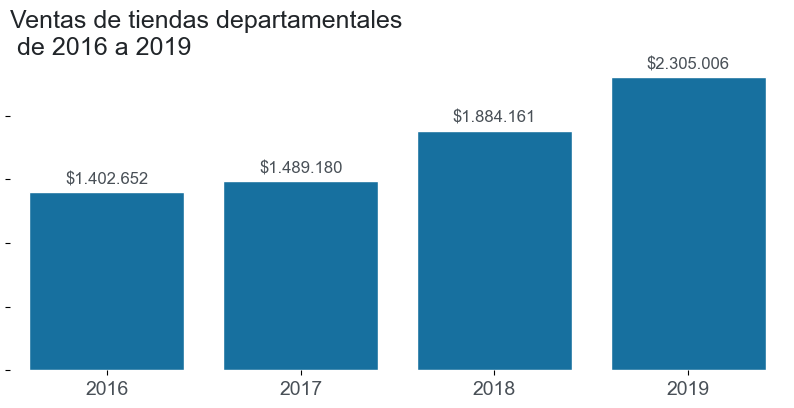

In [8]:
def grafico_columnas(colores: list=[AZUL2]):
    fig, ax = plt.subplots(figsize=(10,4))
    sns.set_theme(style='white')
    
    ax= sns.barplot(data=df_ventas_anho, y = 'ventas', x = df_ventas_anho.index, hue=df_ventas_anho.index, palette=colores, legend=False)
    
    ax.set_title('Ventas de tiendas departamentales\n de 2016 a 2019', loc='left', fontsize=18, color=GRIS1)
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticklabels([])
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=GRIS2)
    sns.despine(left=True, bottom=True)
    
    for i,valor in enumerate(df_ventas_anho['ventas']):
        ct = f'${valor:,.0f}'.replace(',','.')
        offset = 1e5
        ax.text(i,valor+offset,ct,color=GRIS2,fontsize=12,ha='center',va='center')
        
    return ax

    
ax = grafico_columnas()

fig = ax.get_figure()

#### **Añadiendo textos en la visualización**

---




In [9]:
round(((df_ventas_anho['ventas'].max() / df_ventas_anho.loc[df_ventas_anho.index==2018])-1)*100,1)

,ventas
año,
2018,22.3


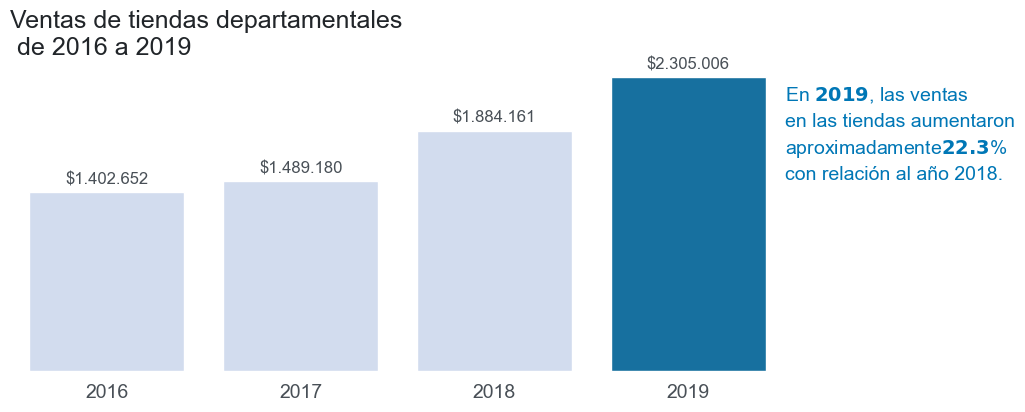

In [10]:
colores = []
for anho in df_ventas_anho.index:
    if df_ventas_anho.loc[anho,'ventas'] == df_ventas_anho['ventas'].max():
        colores.append(AZUL2)
    else:
        colores.append(AZUL5)
        
ax = grafico_columnas(colores)

ax.text(3.5,1.5e6, 'En $\\bf{2019}$, las ventas\n'
        'en las tiendas aumentaron\n'
        'aproximadamente$\\bf{22.3}$%\n'
        'con relación al año 2018.',
        fontsize=14,
        linespacing=1.45,
        color=AZUL2)

fig = ax.get_figure()

### **Pregunta 2 -** ¿Cuáles son los 7 productos que generaron más beneficios en nuestro catálogo durante el periodo representado?

#### **Tratando los datos para generar la visualización**

---

In [11]:
top_ganancia = ventas.copy()
top_ganancia = top_ganancia[['tipo_producto','ganancia']]

top_ganancia = top_ganancia.groupby(['tipo_producto']).aggregate('sum').sort_values('ganancia',ascending=False)

top_7_ganancia = top_ganancia[:7]
top_7_ganancia

,ganancia
tipo_producto,
Piezas de repuesto,91148.67
Neumáticos,67460.05
Herramientas automotrices,63330.22
Pesticidas,53343.89
Herramientas de jardinería,53202.88
Herramientas,41020.34
Macetas,33941.85


#### **Generando el gráfico**

---

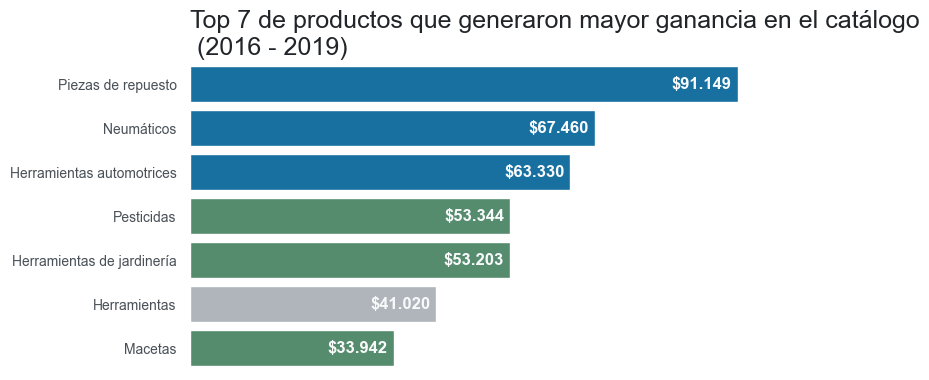

In [12]:
def grafico_barras():
    fig, ax = plt.subplots(figsize=(10,4))
    fig.subplots_adjust(right=0.7)
    sns.set_theme(style='white')
    
    colores=[AZUL2,AZUL2,AZUL2,VERDE1,VERDE1,GRIS3,VERDE1]
    
    ax= sns.barplot(data=top_7_ganancia, y = top_7_ganancia.index, x = top_7_ganancia['ganancia'], palette=colores)
    
    ax.set_title('Top 7 de productos que generaron mayor ganancia en el catálogo\n (2016 - 2019)', loc='left', fontsize=18, color=GRIS1)
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([])
    ax.yaxis.set_tick_params(labelsize=10, labelcolor=GRIS2)
    sns.despine(left=True, bottom=True)
    
    for i,valor in enumerate(top_7_ganancia['ganancia']):
        ct = f'${valor:,.0f}'.replace(',','.')
        offset = 1e3
        ax.text(valor-offset,i,ct,color=GRIS5,fontsize=12,fontweight = 'bold' ,ha='right',va='center')
        
    return ax

    
ax = grafico_barras()

fig = ax.get_figure()

#### **Añadiendo texto destacado**

---




Ya que no existe una función nativa de python para excribir texto de diversos colores en nuestras gráficas, utilizaremos un repositorio de github que contiene diversas funciones que nos permitirán relizar este paso

> Adaptado de https://github.com/empathy87/storytelling-with-data

In [13]:
from matplotlib import transforms

def texto_destacado(x, y, texto, colores, esp=20, ax=None, **kw):
    colores = list(reversed(colores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linea in enumerate(reversed(texto.split('\n'))):
        frases = linea.split('||')
        for s, cor in zip(frases, colores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

#### **Generando el gráfico**

---

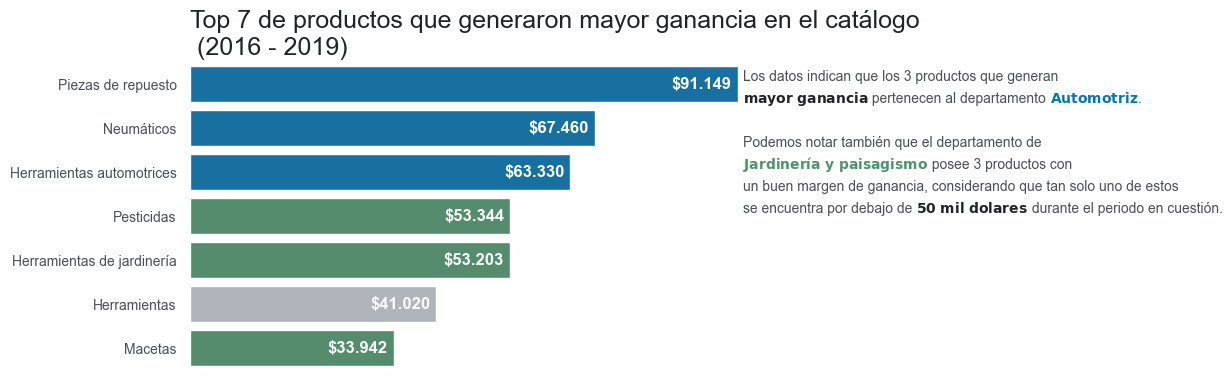

In [14]:
ax = grafico_barras()

texto_destacado(9.2e4, 2.9, 
    'Los datos indican que los 3 productos que generan\n'   #texto
    '$\\bf{mayor\ ganancia}$|| pertenecen al departamento ||$\\bf{Automotriz}$.\n'
    '\n'
    'Podemos notar también que el departamento de\n'
    '$\\bf{Jardinería\ y\ paisagismo}$|| posee 3 productos con\n'
    'un buen margen de ganancia, considerando que tan solo uno de estos\n'
    'se encuentra por debajo de ||$\\bf{50\ mil\ dolares}$|| durante el periodo en cuestión.',
    [[GRIS2],                           #fila 1                 #colores
     [GRIS1, GRIS2, AZUL2],             #fila 2
     [GRIS2],                           #fila 3
     [GRIS2],                           #fila 4
     [VERDE1, GRIS2],                   #fila 5
     [GRIS2],                           #fila 6                                   
     [GRIS2, GRIS1, GRIS2]              #fila 7
     ],
    esp=22, 
    ax=ax,
    fontsize=10)

fig = ax.get_figure()

### **Pregunta 3 -** Si dividimos el total de ventas por año por regiones, ¿qué podemos observar en nuestros datos?

#### **Tratando los datos para generar la visualización**

---

In [15]:
df_ventas_reg = ventas.copy()
df_ventas_reg= df_ventas_reg[['fecha_pedido', 'region', 'ventas']]

df_ventas_reg['año'] = df_ventas_reg['fecha_pedido'].dt.year
df_ventas_reg.drop(labels='fecha_pedido',axis=1,inplace=True)
df_ventas_reg

,region,ventas,año
0,Buenos Aires,890.66,2018
1,Buenos Aires,2488.59,2018
2,Central,49.72,2018
3,Litoral,3255.75,2017
4,Litoral,76.04,2017
...,...,...,...
8935,Central,123.22,2018
8936,Cuyo,271.97,2019
8937,Cuyo,700.75,2019
8938,Patagónica,85.83,2016


In [16]:
ventas_reg = pd.crosstab(index=[df_ventas_reg['año']],columns=df_ventas_reg['region'],values=df_ventas_reg['ventas'],aggfunc='sum')
ventas_reg=ventas_reg[['Buenos Aires','Litoral','Norte','Central','Cuyo','Patagónica']]
ventas_reg

region,Buenos Aires,Litoral,Norte,Central,Cuyo,Patagónica
año,,,,,,
2016,447482.40,258650.64,251356.27,205928.22,174593.67,64641.13
2017,505005.01,289808.32,244946.54,228930.68,109446.32,111042.65
2018,654104.73,363684.46,296360.73,303706.58,200999.46,65305.45
2019,775187.16,449715.97,436180.40,324369.09,198213.80,121339.87


#### **Generando el gráfico**

---

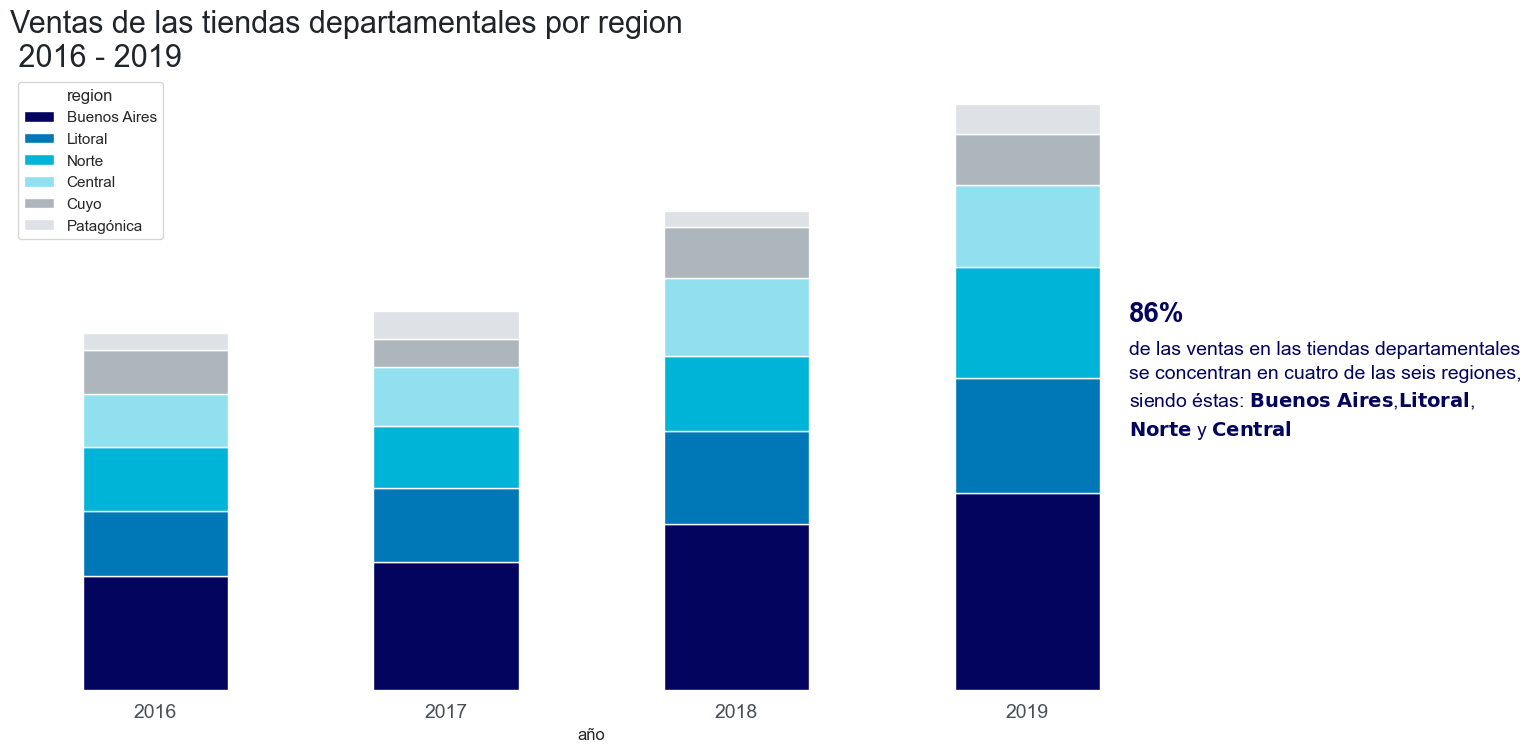

In [17]:
def grafico_region():
    colores=[AZUL1,AZUL2,AZUL3,AZUL4,GRIS3,GRIS4]
    ax = ventas_reg.plot(kind='bar',stacked=True,figsize=(15,8),color=colores)
    ax.set_title('Ventas de las tiendas departamentales por region\n 2016 - 2019',
                 fontsize=22, loc='left', color=GRIS1)
    ax.set_label('')
    ax.set_ylabel('')
    ax.set_yticklabels([])
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=GRIS2,rotation=0)
    ax.set_frame_on(False)
    
    ax.text(3.35,1.45e6,'86%',fontweight='bold',fontsize=20,color=AZUL1)
    ax.text(3.35,1e6,
            'de las ventas en las tiendas departamentales\n'
            'se concentran en cuatro de las seis regiones,\n'
            'siendo éstas: $\\bf{Buenos\\ Aires}$,$\\bf{Litoral}$,\n'
            '$\\bf{Norte}$ y $\\bf{Central}$',
            fontsize=14,
            linespacing=1.45,
            color=AZUL1)
    
    return ax

ax = grafico_region()
fig = ax.get_figure

#### **Añadiendo texto destacado**

---

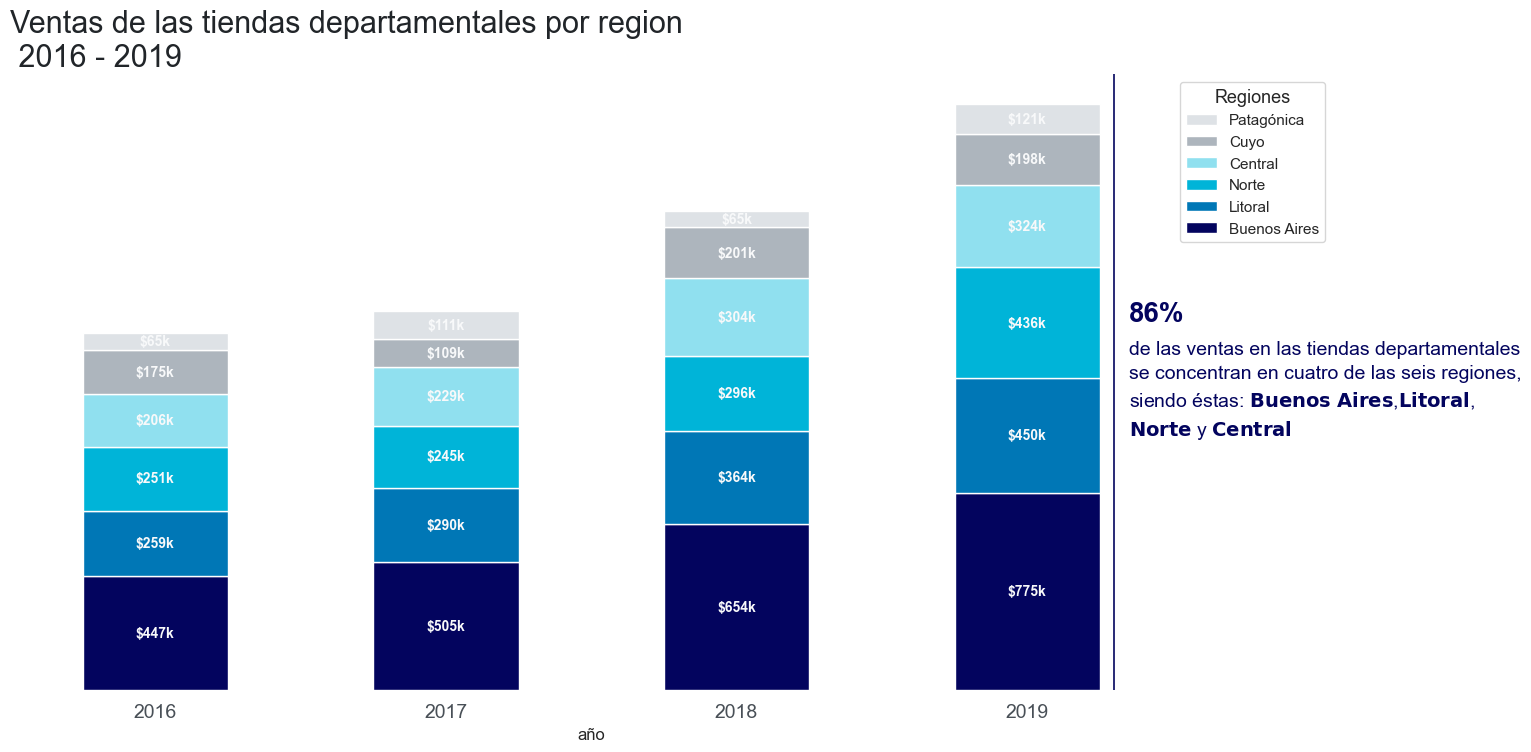

In [18]:
ax = grafico_region()

ax.legend(bbox_to_anchor=(1,1),title='Regiones',reverse=True,
          title_fontsize=13,fontsize=11)

for container in ax.containers:
    labels = [f'${valor.get_height()/1000:,.0f}k'.replace(',','.') for valor in container]
    ax.bar_label(container, label_type='center',labels=labels,size=10,
                 color=GRIS5, fontweight='bold')
    
ax.axvline(3.3,ymin=0.0,ymax=1,color=AZUL1,linewidth=1.2)
fig = ax.get_figure()

### **Pergunta 4 -** ¿Cuál es el método de envío más utilizado por los clientes de la tienda? ¿Es proporcional para B2B y B2C?

#### **Tratando los datos para generar la visualización**

---

In [19]:
ventas

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,provincia,region,departamento,tipo_producto,precio_base,precio_unit_sin_descuento,descuento,precio_unit_venta,cantidad,ventas,ganancia
0,2018-11-09,2018-11-12,Económica,Gaspar Fernández,B2C,Lomas de Zamora,Buenos Aires,Buenos Aires,Materiales de construcción,Fontanería,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Económica,Gaspar Fernández,B2C,Lomas de Zamora,Buenos Aires,Buenos Aires,Materiales de construcción,Herramientas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Económica,Matías González,B2B,Córdoba,Córdoba,Central,Jardinería y paisajismo,Semillas,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega estándar,Lucas González,B2C,Gualeguay,Entre Ríos,Litoral,Materiales de construcción,Materiales de revestimiento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega estándar,Lucas González,B2C,Gualeguay,Entre Ríos,Litoral,Jardinería y paisajismo,Macetas,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-10-04,Entrega estándar,Raúl González,B2C,Córdoba,Córdoba,Central,Automotriz,Herramientas automotrices,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2019-11-18,2019-11-22,Entrega estándar,Antonella Vidal,B2B,General Alvear,Mendoza,Cuyo,Automotriz,Herramientas automotrices,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2019-11-18,2019-11-22,Entrega estándar,Antonella Vidal,B2B,General Alvear,Mendoza,Cuyo,Automotriz,Neumáticos,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2016-01-22,2016-01-24,Económica,Catalina Rojas,B2C,Neuquén,Neuquén,Patagónica,Materiales de construcción,Iluminación,26.29,31.79,0.100,28.61,3,85.83,6.96


In [20]:
df_envio = ventas.copy()
df_envio= df_envio[['modo_envio','segmento_cliente']]
df_envio_seg = pd.crosstab(index=df_envio['modo_envio'],columns=df_envio['segmento_cliente']).sort_values('B2B')
df_envio_seg

segmento_cliente,B2B,B2C
modo_envio,,
Entrega en 24 horas,207,288
Envío rápido,676,673
Económica,829,906
Entrega estándar,2552,2809


In [21]:
df_envio_normalizado = pd.crosstab(index=df_envio['modo_envio'],columns=df_envio['segmento_cliente'],normalize='index')
df_envio_normalizado

segmento_cliente,B2B,B2C
modo_envio,,
Económica,0.477810,0.522190
Entrega en 24 horas,0.418182,0.581818
Entrega estándar,0.476031,0.523969
Envío rápido,0.501112,0.498888


#### **Generando el gráfico**

---

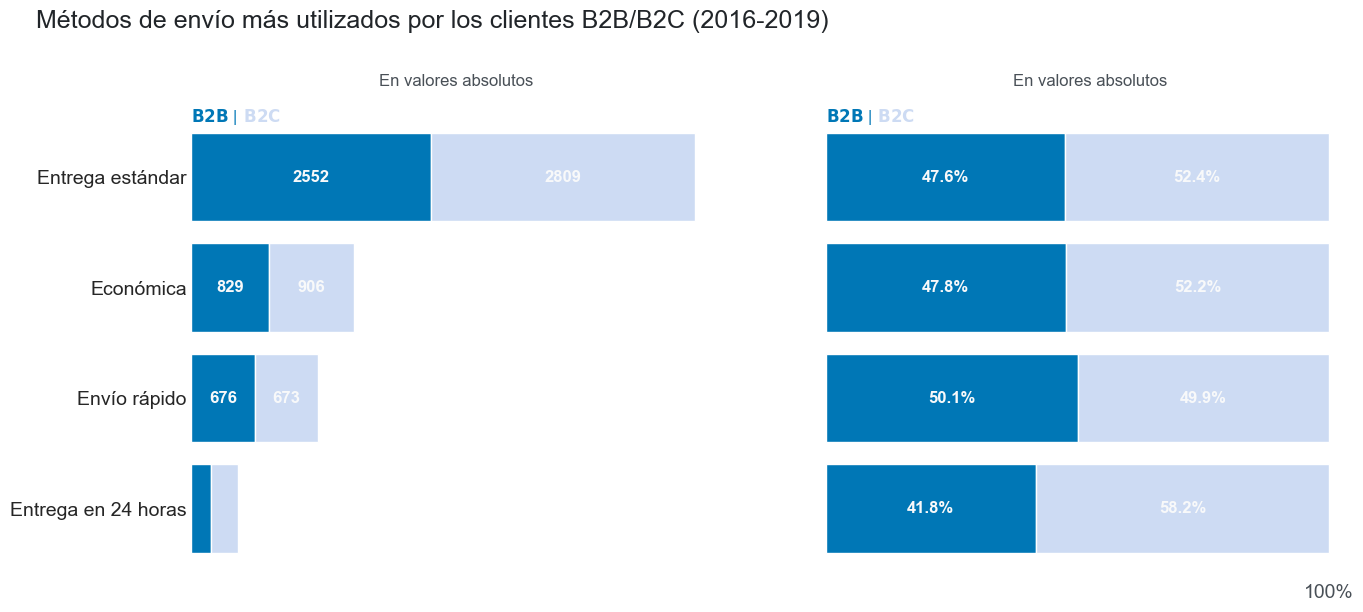

In [22]:
colores=[AZUL2,AZUL5]
fig,ax= plt.subplots(1,2,figsize=(15,6),sharey=True)


ax[0].barh(df_envio_seg.index,df_envio_seg['B2B'],color=colores[0])
ax[0].barh(df_envio_seg.index,df_envio_seg['B2C'],left=df_envio_seg['B2B'],color=colores[1])
ax[0].set_title('En valores absolutos\n', color=GRIS2)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_xticklabels([])
ax[0].yaxis.set_tick_params(labelsize=14,color=GRIS2)
ax[0].set_frame_on(False)

ax[0].tick_params(axis='both',which='both',length=0)

texto_destacado(0,3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', colores=[colores],
                ax=ax[0], fontsize=12)


ax[1].barh(df_envio_normalizado.index,df_envio_normalizado['B2B'],color=colores[0])
ax[1].barh(df_envio_normalizado.index,df_envio_normalizado['B2C'],left=df_envio_normalizado['B2B'],color=colores[1])
ax[1].set_title('En valores absolutos\n', color=GRIS2)
ax[1].set_xlabel('100%',color=GRIS2,size=14,loc='right')
ax[1].set_ylabel('')
ax[1].set_xticklabels([])
ax[1].set_frame_on(False)

ax[1].tick_params(axis='both',which='both',length=0)

texto_destacado(0,3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', colores=[colores],
                ax=ax[1], fontsize=12)

fig.suptitle('Métodos de envío más utilizados por los clientes B2B/B2C (2016-2019)\n',
             fontsize=18,color=GRIS1,ha='right',x=0.55,y=1.05)

for container in ax[0].containers:
    labels= [str(valor.get_width()) if valor.get_width() > 300 else '' for valor in container]
    ax[0].bar_label(container,label_type='center',labels=labels,size=12,
                    color=GRIS5, fontweight='bold')
          
for container in ax[1].containers:
    labels= [f'{valor.get_width()*100:.1f}%' for valor in container]
    ax[1].bar_label(container,label_type='center',labels=labels,size=12,
                    color=GRIS5, fontweight='bold')
    
fig.show()

### **Pregunta 5 -** ¿Cuál es el total de ventas por trimestre en la provincia de Buenos Aires?

#### **Tratando los datos para generar la visualización**

---

In [23]:
df_bsas = ventas.copy()
df_bsas

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,provincia,region,departamento,tipo_producto,precio_base,precio_unit_sin_descuento,descuento,precio_unit_venta,cantidad,ventas,ganancia
0,2018-11-09,2018-11-12,Económica,Gaspar Fernández,B2C,Lomas de Zamora,Buenos Aires,Buenos Aires,Materiales de construcción,Fontanería,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Económica,Gaspar Fernández,B2C,Lomas de Zamora,Buenos Aires,Buenos Aires,Materiales de construcción,Herramientas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Económica,Matías González,B2B,Córdoba,Córdoba,Central,Jardinería y paisajismo,Semillas,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega estándar,Lucas González,B2C,Gualeguay,Entre Ríos,Litoral,Materiales de construcción,Materiales de revestimiento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega estándar,Lucas González,B2C,Gualeguay,Entre Ríos,Litoral,Jardinería y paisajismo,Macetas,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-10-04,Entrega estándar,Raúl González,B2C,Córdoba,Córdoba,Central,Automotriz,Herramientas automotrices,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2019-11-18,2019-11-22,Entrega estándar,Antonella Vidal,B2B,General Alvear,Mendoza,Cuyo,Automotriz,Herramientas automotrices,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2019-11-18,2019-11-22,Entrega estándar,Antonella Vidal,B2B,General Alvear,Mendoza,Cuyo,Automotriz,Neumáticos,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2016-01-22,2016-01-24,Económica,Catalina Rojas,B2C,Neuquén,Neuquén,Patagónica,Materiales de construcción,Iluminación,26.29,31.79,0.100,28.61,3,85.83,6.96


In [24]:
df_bsas = df_bsas.query('provincia == "Buenos Aires"')[['ventas','fecha_pedido']]
df_bsas.set_index('fecha_pedido',inplace=True)
df_bsas = df_bsas.resample('Q').agg('sum')
df_bsas['ventas'] = round(df_bsas['ventas']/100,2)
df_bsas = df_bsas.reset_index()

In [25]:
df_bsas

,fecha_pedido,ventas
0,2016-03-31,418.73
1,2016-06-30,437.87
2,2016-09-30,1549.07
3,2016-12-31,1448.24
4,2017-03-31,361.33
5,2017-06-30,768.62
6,2017-09-30,1297.62
7,2017-12-31,1979.40
8,2018-03-31,442.63
9,2018-06-30,1096.37


#### **Generando gráfico**

---

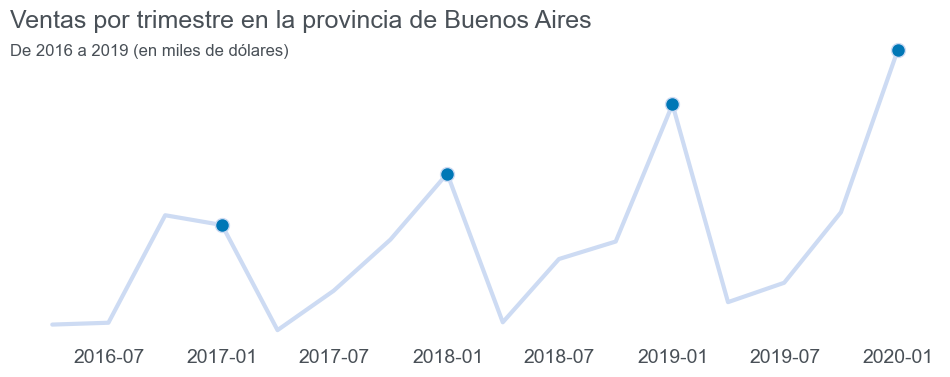

In [26]:
def grafico_trimestre_bsas():
    fig, ax = plt.subplots(figsize=(12,4))
    
    puntos_a_marcar = [True if mes == 12 else False for mes in df_bsas['fecha_pedido'].dt.month]
    
    ax.plot(df_bsas['fecha_pedido'],df_bsas['ventas'],lw=3,color=AZUL5,marker='o',
            markersize=10,markerfacecolor=AZUL2,markevery=puntos_a_marcar)
    
    ax.set_title('Ventas por trimestre en la provincia de Buenos Aires', fontsize=18,color=GRIS2,
                 loc='left')
    ax.text(0.3,0.95, 'De 2016 a 2019 (en miles de dólares)',transform=ax.transAxes,color=GRIS2,fontsize=12, ha='right', va='center')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticklabels([])
    ax.set_frame_on(False)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=GRIS2)
    
    ax.tick_params(axis='both',which='both',length=0)
    
    #plt.ylim(0,400)
    
    return ax

ax = grafico_trimestre_bsas()

fig = ax.get_figure()
    

#### **Definiendo los intervalos de tiempo y agregando texto**

---



In [27]:
import matplotlib.dates as mdates

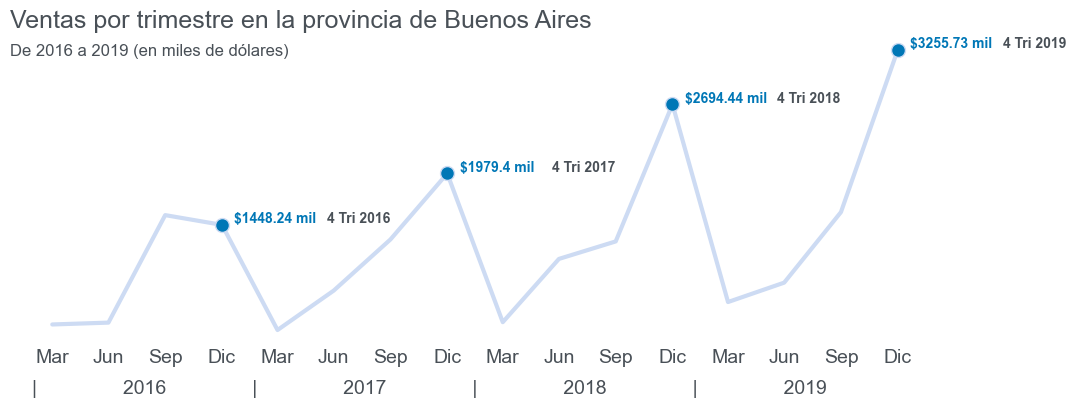

In [28]:
ax = grafico_trimestre_bsas()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
x_labels = ['Mar','Jun','Sep','Dic'] * 4
ax.set_xticks(df_bsas['fecha_pedido'])
ax.set_xticklabels(x_labels,ha='center')

texto = [16 * ' ' + str(i) + 16 * ' ' for i in range(2016,2020)]
ax.text(ax.get_xbound()[0]+ 35, -300, f'|{texto[0]}|{texto[1]}|{texto[2]}|{texto[3]}',fontsize=14, color=GRIS2)

anho = 0

for i in range(3,len(df_bsas['ventas']),4):
    ax.text(x = ax.get_xticks()[i]+20, y= df_bsas['ventas'][i]+ 20,
            s=f'${df_bsas["ventas"][i]} mil', color=AZUL2,
            weight='bold', fontsize=10)
    ax.text(x = ax.get_xticks()[i]+ 170, y= df_bsas['ventas'][i]+ 20,
            s=f'4 Tri {2016 + anho}', color=GRIS2,
            weight='bold', fontsize=10)
    anho += 1
    
fig = ax.get_figure()

### **Pregunta 6 -** ¿Cuál es la facturación por trimestre en cada región?

#### **Tratando los datos para generar la visualización**

---

In [29]:
df_region_tri = ventas.copy()
df_region_tri = df_region_tri[['region','fecha_pedido','ventas']]
df_region_tri = pd.crosstab(index=df_region_tri['fecha_pedido'],columns=df_region_tri['region'],values=df_region_tri['ventas'],aggfunc='sum')
df_region_tri

region,Buenos Aires,Central,Cuyo,Litoral,Norte,Patagónica
fecha_pedido,,,,,,
2016-01-04,NaN,NaN,NaN,55.92,NaN,NaN
2016-01-05,979.42,NaN,NaN,NaN,NaN,NaN
2016-01-06,66.42,NaN,NaN,NaN,NaN,NaN
2016-01-07,14874.57,66.09,43.44,NaN,NaN,NaN
2016-01-08,NaN,296.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2019-12-27,NaN,NaN,2552.32,162.79,NaN,NaN
2019-12-28,603.96,NaN,NaN,NaN,NaN,NaN
2019-12-29,457.38,NaN,2467.84,677.21,453.47,1158.42


In [30]:
df_region_tri = df_region_tri.resample('Q').sum()

In [31]:
df_region_tri= round(df_region_tri/1e3,2)
df_region_tri

region,Buenos Aires,Central,Cuyo,Litoral,Norte,Patagónica
fecha_pedido,,,,,,
2016-03-31,44.13,12.85,28.72,29.07,19.43,5.34
2016-06-30,61.74,55.59,40.65,44.69,51.53,22.06
2016-09-30,171.81,30.47,63.59,78.07,101.86,12.28
2016-12-31,169.81,107.02,41.63,106.83,78.54,24.96
2017-03-31,38.30,62.29,22.49,25.65,47.63,39.00
2017-06-30,88.54,62.14,22.20,57.22,32.21,5.69
2017-09-30,160.78,35.56,40.67,81.44,60.70,37.93
2017-12-31,217.38,68.94,24.08,125.49,104.40,28.41
2018-03-31,56.12,62.05,37.84,76.64,26.78,28.80


In [32]:
df_region_tri=df_region_tri[['Buenos Aires','Litoral','Norte','Central','Cuyo','Patagónica']]
df_region_tri

region,Buenos Aires,Litoral,Norte,Central,Cuyo,Patagónica
fecha_pedido,,,,,,
2016-03-31,44.13,29.07,19.43,12.85,28.72,5.34
2016-06-30,61.74,44.69,51.53,55.59,40.65,22.06
2016-09-30,171.81,78.07,101.86,30.47,63.59,12.28
2016-12-31,169.81,106.83,78.54,107.02,41.63,24.96
2017-03-31,38.30,25.65,47.63,62.29,22.49,39.00
2017-06-30,88.54,57.22,32.21,62.14,22.20,5.69
2017-09-30,160.78,81.44,60.70,35.56,40.67,37.93
2017-12-31,217.38,125.49,104.40,68.94,24.08,28.41
2018-03-31,56.12,76.64,26.78,62.05,37.84,28.80


#### **Generando gráfico**

---

In [33]:
import plotly.express as px

In [34]:
fig = px.line(df_region_tri, x= df_region_tri.index, y = df_region_tri.columns, markers = True, labels={'region':'Región'}, color_discrete_sequence=[AZUL2,ROJO1,AMARILLO1,VERDE1,GRIS3])

fig.update_layout(width= 1300, height= 600, font_family= 'DejaVu Sans', font_size=15, font_color= GRIS2,
                  title_font_color=GRIS1, title_font_size=24,
                  title_text= 'Facturación de las tiendas por trimestre' + '<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>',
                  xaxis_title= '',yaxis_title= '', plot_bgcolor=GRIS5)

fig.update_yaxes(tickprefix= '$ ', ticksuffix= ' k')

labels= ['T1<br>2016','T2<br>2016','T3<br>2016','T4<br>2016',
         'T1<br>2017','T2<br>2017','T3<br>2017','T4<br>2017',
         'T1<br>2018','T2<br>2018','T3<br>2018','T4<br>2018'
         'T1<br>2019','T2<br>2019','T3<br>2019','T4<br>2019']

fig.update_xaxes(ticktext=labels,tickvals=df_region_tri.index)

fig.show()

#### **Personalizando el texto informativo (hover)**

---




In [35]:
fig.update_traces(hovertemplate = '<b>Periodo:</b> %{x} <br>Facturación:</b> %{y}')
fig.update_layout(hovermode='closest')
# fig.update_layout(hovermode='x')
# fig.update_layout(hovermode='x unified')

fig.show()

## **Situación 2**

Una empresa encargada de la fabricación de productos de limpieza se propone a hacer el análisis de uno de los suavizantes que tienen en el mercado, es por ello que proprcionaron las siguientes dos bases de datos:

1. Volúmenes de un suavizante de 1 litro en un total de 1000 muestras medidas.

2. Medidas de altura, longitud y anchura de una caja de detergente en polvo en un total de 1000 muestras medidas.

### **Base de Datos 1 - Volumen de suavizante de 1 litro**

---

In [36]:
df_suavizante = pd.read_csv('suavizante.csv')
df_suavizante.head()

,Volumen
0,999.8
1,999.5
2,999.7
3,999.1
4,999.8


In [37]:
df_suavizante.describe()

,Volumen
count,1000.00000
mean,999.98970
std,0.48553
min,998.30000
25%,999.70000
50%,1000.00000
75%,1000.30000
max,1001.50000


In [38]:
df_suavizante.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Volumen  1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


Después de visualizar rápidamente los datos, se procederá con el análisis de la información y su exposición en forma de gráficos. Las dos preguntas a contestar serán:

#### **Preguntas:**

1. ¿Cómo están distribuidos los datos de los volúmenes de la muestra del suavizante? ¿Cuál sería su valor central (promedio y mediana)?

2. ¿Cómo están distribuidos los datos de los volúmenes del suavizante según la mediana y los cuartiles? ¿Existen datos atípicos?

---



#### **Pregunta 1 -** ¿Cómo están distribuidos los datos de los volúmenes de la muestra del suavizante? ¿Cuál sería su valor central (promedio y mediana)?

---

##### **Generando el gráfico (histograma)**

---

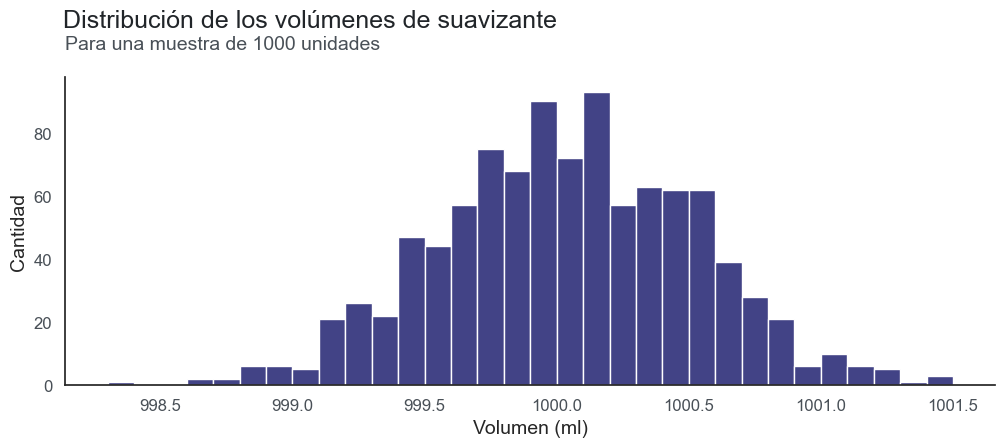

In [39]:
def grafico_histograma():

    fig, ax = plt.subplots(figsize=(12,4))
    sns.set_theme(style='white')

    ax= sns.histplot(data=df_suavizante, x=df_suavizante['Volumen'], binwidth=0.1, color=AZUL1)

    plt.suptitle('Distribución de los volúmenes de suavizante', size=18,
                color= GRIS1, ha='right', x=0.535, y= 1.05)
    plt.title('Para una muestra de 1000 unidades', fontsize=14, color=GRIS2, loc='left',pad=20)

    ax.set_xlabel('Volumen (ml)', fontsize=14)
    ax.set_ylabel('Cantidad', fontsize=14)
    ax.xaxis.set_tick_params(labelsize=12, labelcolor=GRIS2)
    ax.yaxis.set_tick_params(labelsize= 12, labelcolor= GRIS2)

    sns.despine()
    
    return ax

ax = grafico_histograma()
fig = ax.get_figure()

Para tener una mejor visualización de los datos, se elabprará también un gráfico de densidad

##### **Generando el gráfico (densidad)**

---

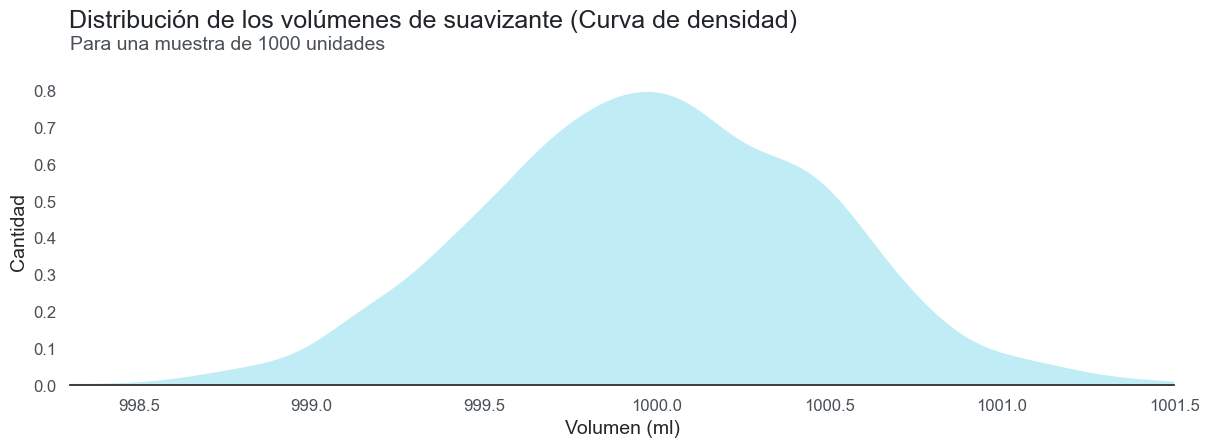

In [40]:
def grafico_densidad():

    fig, ax = plt.subplots(figsize=(14.25,4))
    sns.set_theme(style='white')

    ax= sns.kdeplot(data=df_suavizante, x=df_suavizante['Volumen'], lw=0, color=AZUL3, fill=True)

    plt.suptitle('Distribución de los volúmenes de suavizante (Curva de densidad)', size=18,
                color= GRIS1, ha='right', x=0.635, y= 1.05)
    plt.title('Para una muestra de 1000 unidades', fontsize=14, color=GRIS2, loc='left',pad=20)

    ax.set_xlabel('Volumen (ml)', fontsize=14)
    ax.set_ylabel('Cantidad', fontsize=14)
    ax.xaxis.set_tick_params(labelsize=12, labelcolor=GRIS2)
    ax.yaxis.set_tick_params(labelsize= 12, labelcolor= GRIS2)
    ax.set_xlim(df_suavizante['Volumen'].min(), df_suavizante['Volumen'].max())

    sns.despine(left=True,top=True)

    return ax

ax = grafico_densidad()

fig = ax.get_figure()

##### **Añadiendo líneas y texto al gráfico**

---


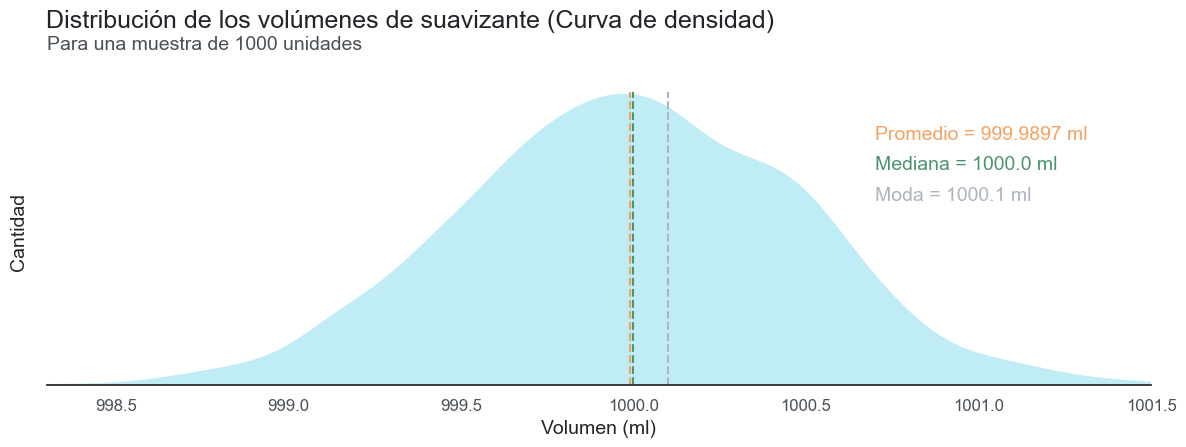

In [41]:
ax = grafico_densidad()

ax.set_ylabel=('')
ax.set_yticklabels([])

estad = df_suavizante['Volumen'].mean(), df_suavizante['Volumen'].median(),df_suavizante['Volumen'].mode()[0]

descr = ['Promedio','Mediana','Moda']

colores = [ANARANJADO1,VERDE1,GRIS3]

ax.vlines(estad, ymin=0, ymax=0.8, colors=colores, linestyles='--')

for i in range(len(estad)):
    ax.text(0.75,(0.8-i/10), f'{descr[i]} = {estad[i]} ml', fontsize=14, color=colores[i], transform= ax.transAxes) 

fig = ax.get_figure()

#### **Pregunta 2 -** ¿Cómo están distribuidos los datos de los volúmenes del suavizante según la mediana y los cuartiles? ¿Existen datos atípicos?

---

##### **Generando el gráfico (Boxplot)**

---

Text(50, 0, '3er Cuadril / 75%')

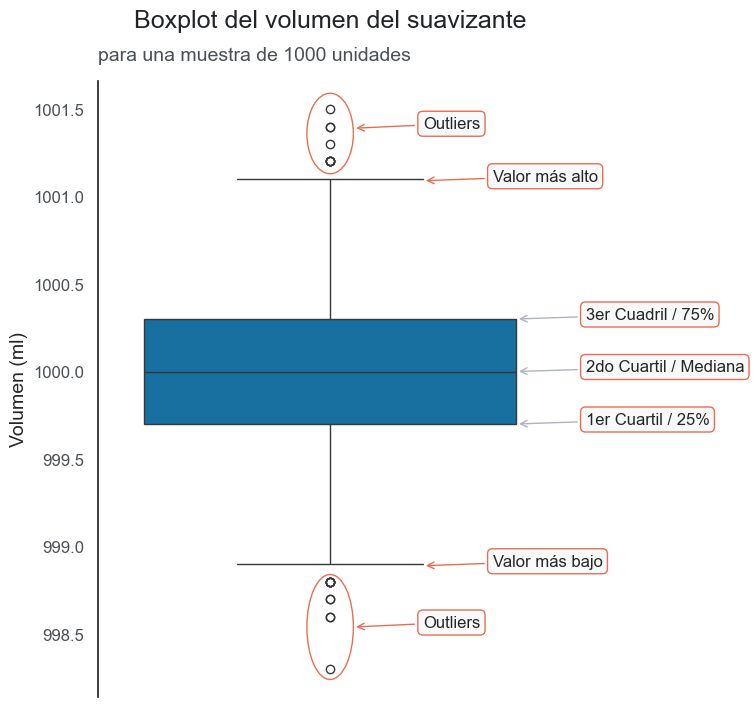

In [42]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize=(6,8))
sns.set_theme(style='white')

ax = sns.boxplot(data= df_suavizante, y= 'Volumen', orient='v', color=AZUL2)

plt.suptitle('Boxplot del volumen del suavizante', size=18, color= GRIS1, ha='right', x= 0.84, y=0.97)
plt.title('para una muestra de 1000 unidades', fontsize=14, color=GRIS2, pad=15, loc='left')

ax.set_xlabel('')
ax.set_ylabel('Volumen (ml)', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor= GRIS2)
sns.despine(bottom=True)

ymin, ymax = ax.get_ybound()

outlier_sup = Ellipse((0,ymax-0.3), width=0.1, height=0.46, color=ROJO1, fill=False)
outlier_inf = Ellipse((0,ymin + 0.4), width=0.1, height=0.6, color=ROJO1, fill=False)

ax.add_patch(outlier_sup)
ax.add_patch(outlier_inf)

ax.annotate('Outliers', xy=(0.05, ymax - 0.27), xycoords='data', bbox=dict(boxstyle='round', fc= GRIS5, ec=ROJO1), xytext=(50,0), textcoords='offset points', arrowprops= dict(arrowstyle='->', color= ROJO1))

ax.annotate('Outliers', xy=(0.05, ymin + 0.4), xycoords='data', bbox=dict(boxstyle='round', fc= GRIS5, ec=ROJO1), xytext=(50,0), textcoords='offset points', arrowprops= dict(arrowstyle='->', color= ROJO1))

ax.annotate('Valor más alto', xy=(0.2, ymax - 0.57), xycoords='data', bbox=dict(boxstyle='round', fc= GRIS5, ec=ROJO1), xytext=(50,0), textcoords='offset points', arrowprops= dict(arrowstyle='->', color= ROJO1))

ax.annotate('Valor más bajo', xy=(0.2, ymin + 0.75), xycoords='data', bbox=dict(boxstyle='round', fc= GRIS5, ec=ROJO1), xytext=(50,0), textcoords='offset points', arrowprops= dict(arrowstyle='->', color= ROJO1))

ax.annotate('1er Cuartil / 25%', xy=(0.4, df_suavizante.quantile(.25)), xycoords='data', bbox=dict(boxstyle='round', fc= GRIS5, ec=ROJO1), xytext=(50,0), textcoords='offset points', arrowprops= dict(arrowstyle='->', color= GRIS3))

ax.annotate('2do Cuartil / Mediana', xy=(0.4, df_suavizante.median()), xycoords='data', bbox=dict(boxstyle='round', fc= GRIS5, ec=ROJO1), xytext=(50,0), textcoords='offset points', arrowprops= dict(arrowstyle='->', color= GRIS3))

ax.annotate('3er Cuadril / 75%', xy=(0.4, df_suavizante.quantile(.75)), xycoords='data', bbox=dict(boxstyle='round', fc= GRIS5, ec=ROJO1), xytext=(50,0), textcoords='offset points', arrowprops= dict(arrowstyle='->', color= GRIS3))

### **Base de Datos 2 - Muestras de las medidas de la caja del detergente**

---

In [43]:
df_caja = pd.read_csv('cajas_detergente.csv')
df_caja

,longitud,altura,profundidad,muestra
0,20.11,14.89,4.95,A
1,20.13,14.86,5.06,A
2,19.99,15.01,4.97,A
3,20.06,14.93,4.94,A
4,19.99,15.01,5.09,A
...,...,...,...,...
995,20.08,14.92,4.97,E
996,20.13,14.86,5.00,E
997,20.00,15.00,5.06,E
998,20.04,14.96,5.10,E


Después de un análisis rápido de la información, se plantearon dos preguntas para analizar la segunda base de datos:

### **Preguntas**

3. ¿Cómo está distribuida la longitud de las cajas de detergente en polvo para cada una de las muestras?

4. ¿Cómo están dispuestas las medidas de longitud y altura de la muestra A? Si queremos rechazar todos los artículos en los que el valor de longitud y altura esté un 1% por encima o por debajo de los valores de 20 y 15 respectivamente, ¿cuáles serían rechazados?

Para cada una de ellas se utilizará el tipo de gráfico que mejor se adapte a la respuesta.


#### **Pregunta 3 -** ¿Cómo está distribuida la longitud de las cajas de detergente en polvo para cada una de las muestras?

---

##### **Visualizando los Datos**

---

In [44]:
df_caja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   longitud     1000 non-null   float64
 1   altura       1000 non-null   float64
 2   profundidad  1000 non-null   float64
 3   muestra      1000 non-null   object 
dtypes: float64(3), object(1)
memory usage: 31.4+ KB


In [45]:
df_caja.sample(10)

,longitud,altura,profundidad,muestra
271,20.14,14.84,5.03,B
515,20.03,14.97,4.97,C
957,20.05,14.95,4.97,E
511,20.01,14.99,4.89,C
696,19.99,15.01,5.02,D
206,19.97,15.02,5.09,B
456,19.97,15.03,4.87,C
414,20.04,14.95,5.00,C
126,20.10,14.89,5.03,A
709,20.01,14.99,5.08,D


##### **Generando el gráfico (Gráfico de VIolín)**

---

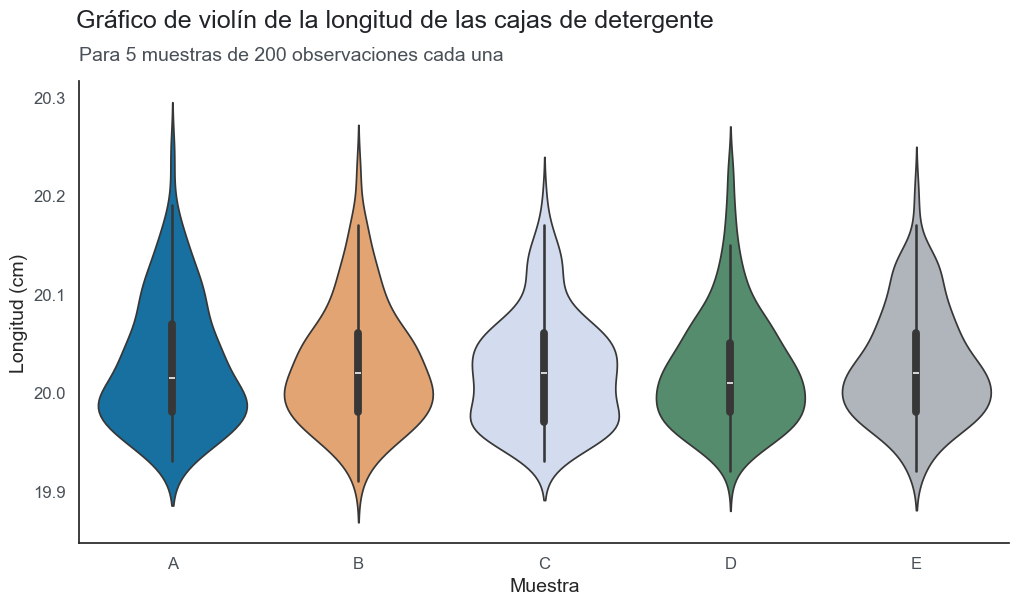

In [46]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set_theme(style='whitegrid')

ax = sns.violinplot(data=df_caja, x= df_caja['muestra'], y= df_caja['longitud'], palette=[AZUL2,ANARANJADO1,AZUL5,VERDE1,GRIS3])

plt.suptitle('Gráfico de violín de la longitud de las cajas de detergente', size=18, color=GRIS1, ha='right', x=0.654, y=1)
plt.title('Para 5 muestras de 200 observaciones cada una', fontsize=14, color=GRIS2, loc='left',pad=15)

ax.set_xlabel('Muestra', fontsize=14)
ax.set_ylabel('Longitud (cm)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12, labelcolor=GRIS2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor=GRIS2)
sns.despine()

#### **Pregunta 4 -** ¿Cómo están dispuestas las medidas de longitud y altura de la muestra A? Si queremos rechazar todos los artículos en los que el valor de longitud y altura esté un 1% por encima o por debajo de los valores de 20 y 15 respectivamente, ¿cuáles serían rechazados?

##### **Visualizando los datos**

---

In [47]:
df_a = df_caja.query('muestra == "A"')[['longitud','altura']]
df_a.head()

,longitud,altura
0,20.11,14.89
1,20.13,14.86
2,19.99,15.01
3,20.06,14.93
4,19.99,15.01


##### **Generando el gráfico (Gráficod de Dispersión)**

---

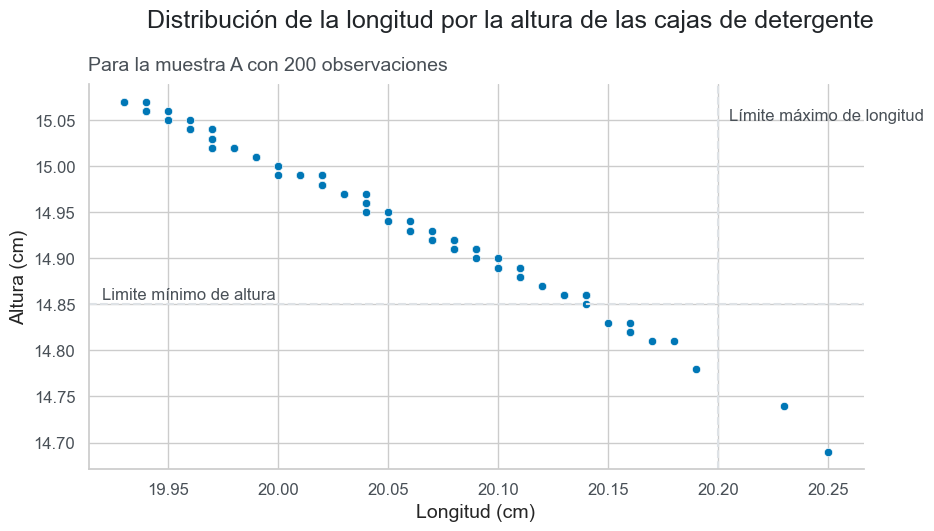

In [48]:
def grafico_dispersion(map_colores: list=[AZUL2], pct: float=0.01):

    fig, ax = plt.subplots(figsize=(10,5))
    sns.set_theme(style='white')

    ax = sns.scatterplot(data= df_a, x= 'longitud', y = 'altura', color=map_colores)

    plt.suptitle('Distribución de la longitud por la altura de las cajas de detergente', size=18, color=GRIS1, ha='right', x=0.91, y=1.03)
    plt.title('Para la muestra A con 200 observaciones', fontsize=14, color= GRIS2, pad = 10, loc= 'left')

    ax.set_xlabel('Longitud (cm)', fontsize=14)
    ax.set_ylabel('Altura (cm)', fontsize=14)
    ax.xaxis.set_tick_params(labelsize=12, labelcolor=GRIS2)
    ax.yaxis.set_tick_params(labelsize=12, labelcolor=GRIS2)

    sns.despine()

    ax.text(x=19.92, y= 14.86,s='Limite mínimo de altura', fontsize=12, color= GRIS2, va='center' )

    plt.axhline(y = 15 * (1-pct), color= GRIS4, linestyle='--')

    ax.text(x=20.205, y=15.05, s='Límite máximo de longitud',fontsize=12, color= GRIS2, ha='left')
    
    plt.axvline(x = 20 * (1+pct), color= GRIS4, linestyle='--')
    
    return ax
    
ax = grafico_dispersion()

fig = ax.get_figure()

##### **Mapeando los datos por colores**

---

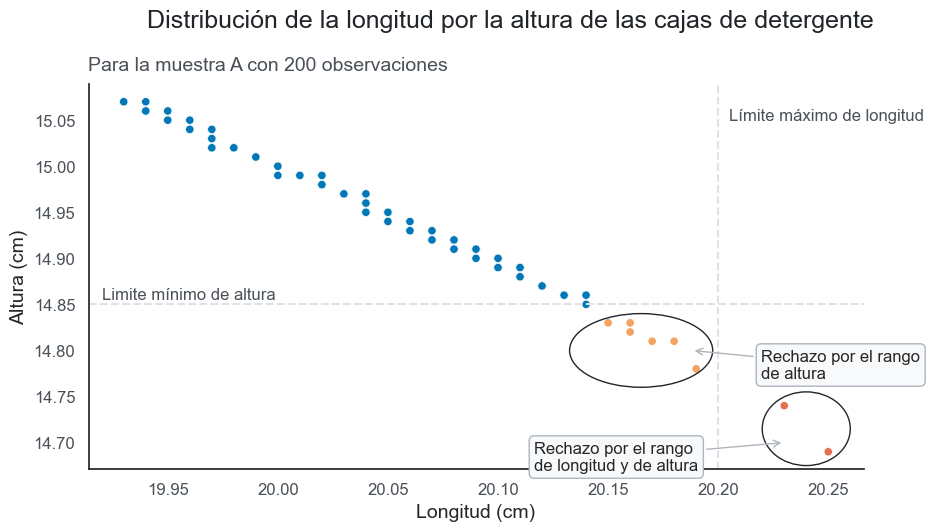

In [49]:
import numpy as np

colores__mapeado = [ROJO1, ANARANJADO1, AZUL2]

pct = 0.01
rechazar_long = [True if (l > 20 * (1+pct) or l < 20 * (1-pct)) else False for l in df_a['longitud']]
rechazar_altura = [True if (a > 15 * (1+pct) or a < 15 * (1-pct)) else False for a in df_a['altura']]
map_colores = np.where(rechazar_long,colores__mapeado[0], np.where(rechazar_altura,colores__mapeado[1],colores__mapeado[2]))

ax = grafico_dispersion(map_colores,pct)

rech_long = Ellipse((20.165,14.80), width=0.065, height=0.08, color= GRIS1, fill= False)
rech_alt = Ellipse((20.24,14.715), width=0.04, height=0.08, color= GRIS1, fill= False)

ax.add_patch(rech_long)
ax.add_patch(rech_alt)

ax.annotate('Rechazo por el rango\nde altura', xy=(20.188,14.80), xycoords='data', bbox=dict(boxstyle='round', 
            fc= GRIS5, ec=GRIS3), xytext=(50,-20), textcoords='offset points', arrowprops= dict(arrowstyle='->', color= GRIS3))
ax.annotate('Rechazo por el rango\nde longitud y de altura', xy=(20.23,14.70), xycoords='data', bbox=dict(boxstyle='round', 
            fc= GRIS5, ec=GRIS3), xytext=(-180,-20), textcoords='offset points', arrowprops= dict(arrowstyle='->', color= GRIS3))

fig = ax.get_figure()